#Importing Dataset

در این قسمت ابتدا فایل اکسل را می‌خوانیم و آن را در قالب یک دیتافریم پانداس ذخیره می‌کنیم. برای راحتی کار، داده‌های متنی را در انتهای مجموعه داده قرار می‌دهیم تا کار پیش پردازش ساده‌تر شود. نهایتا نیز یک ماتریس متغیر‌های مستقل یا همان ویژگی و یک بردار برای متغیر وابسته استخراج می‌کنیم

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset = dataset[[c for c in dataset if c not in ['General Health', 'Sex', 'Education', 'Income']]
       + ['General Health', 'Sex', 'Education', 'Income']]
cols = list(dataset.columns)[2:]
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
print(x.shape)

(70692, 21)


In [ ]:
print(x)

[[1.0 0.0 1.0 ... 'male' 'Cat6' 'Cat8']
 [1.0 1.0 1.0 ... 'male' 'Cat6' 'Cat8']
 [0.0 0.0 1.0 ... 'male' 'Cat6' 'Cat8']
 ...
 [1.0 1.0 1.0 ... 'female' 'Cat6' 'Cat4']
 [1.0 1.0 1.0 ... 'female' 'Cat2' 'Cat4']
 [1.0 1.0 1.0 ... 'female' 'Cat6' 'Cat2']]


In [ ]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


#Data Preprocessing

##Handling Missing and Corrupted Data

برای حل مشکل خانه‌های مجموعه‌داده که مقدار ندارند از استراتژی جایگذاری آن‌ها با متداول‌ترین مقدار در آن ستون استفاده می‌کنیم.

In [ ]:
# for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x)
x = imputer.transform(x)

یک سری از داده‌ها نیز ممکن است با نوع داده‌ی ستون متناظرشان مظابق نباشند. مثلا جنسیت یک ویژگی متنی‌ است ولی ممکن است به اشتباه در وارد کردن داده‌ها یک عدد در ستون آن قرار گیرد. برای حل این مشکل بعد از شناسایی این داده‌ها سطر مربوط به آن‌ها را حذف می‌کنیم.

In [ ]:
# for corrupted data with wrong data type
correct_type = dict()
for i in range(x.shape[1]):
  correct_type[i] = type(x[0,i])
for i in range(x.shape[1]):
  for j in range(x.shape[0]):
    if type(x[j, i]) != correct_type[i]:
      x = np.delete(x, j, 0)

##Removing Whitespaces

در این قسمت برای سادگی کار مشاهده کردیم که فقط ستون سلامت عمومی و اسم ستون‌ها دارای فاصله هستند. پس فقط برای همین دو مورد حذف فاصله‌ها را اعمال می‌کنیم.

In [ ]:
for i in range(len(cols)):
  cols[i] = cols[i].replace(" ", "")
for j in range(x.shape[0]):
  x[j, 17] = x[j, 17].replace(" ", "") #general health

مشاهده می‌شود که به درستی فواصل حذف شده‌اند

In [ ]:
print(x[:, 17])

['Medium' 'Medium' 'High' ... 'VeryLow' 'Low' 'Good']


##Transforming Categorical Data

با استفاده از وان هات انکدر و با کالمن ترنسفورمر ستون‌هایی که از نوع رشته متنی هستند را به ویژگی عددی تبدیل می‌کنیم.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
coltr = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17, 18, 19, 20])], remainder='passthrough')
x = np.array(coltr.fit_transform(x))

In [ ]:
print(x)

[[0.0 0.0 0.0 ... 30.0 0.0 4.0]
 [0.0 0.0 0.0 ... 0.0 0.0 12.0]
 [0.0 1.0 0.0 ... 10.0 0.0 13.0]
 ...
 [0.0 0.0 0.0 ... 0.0 1.0 13.0]
 [0.0 0.0 1.0 ... 0.0 1.0 11.0]
 [1.0 0.0 0.0 ... 0.0 0.0 9.0]]


##Normalizing Data

یکی از روش‌های نرمالایز کردن، استفاده از اسکیلر مینیمم و ماکسیمم است که اعداد را به بازه‌ی ۰ تا ۱ مپ می‌کند

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
x = normalizer.fit_transform(x)

In [ ]:
print(x[:, -1])

[0.25       0.91666667 1.         ... 1.         0.83333333 0.66666667]


#‌‌Building the Classifier

در این بخش ابتدا داده‌های آموزش و تست را جدا می‌کنیم. ۲۰ درصد از داده‌ها به عنوان داده‌ی تست در نظر گرفته می‌شود

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


با استفاده از پارامتر‌های گفته شده درصورت پروژه مدل دسته‌بندی خود را ساخته و روی داده‌های آموزشی آن را آموزش می‌دهیم. برای اینکه آموزش خیلی زمان بر نشود تا ۱۰ دور بیشتر آن را آموزش نمی‌دهیم

In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
xgb_cl = xgb.XGBClassifier(learning_rate=0.1, max_depth=4,
                       n_estimators=200, subsample=0.5,
                       Colsample_bytree=1, Random_seed=123,
                       Eval_metric='auc', Verbosity=1)
# Fit
xgb_cl.fit(x_train, y_train,
            eval_set=[(x_train, y_train), (x_test, y_test)],
            early_stopping_rounds=10)

[0]	validation_0-error:0.278288	validation_1-error:0.276257
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.274221	validation_1-error:0.275408
[2]	validation_0-error:0.275246	validation_1-error:0.274984
[3]	validation_0-error:0.266529	validation_1-error:0.269467
[4]	validation_0-error:0.26522	validation_1-error:0.268831
[5]	validation_0-error:0.265592	validation_1-error:0.268831
[6]	validation_0-error:0.265379	validation_1-error:0.267133
[7]	validation_0-error:0.263063	validation_1-error:0.26678
[8]	validation_0-error:0.261949	validation_1-error:0.264729
[9]	validation_0-error:0.260941	validation_1-error:0.263314
[10]	validation_0-error:0.259226	validation_1-error:0.261546
[11]	validation_0-error:0.25889	validation_1-error:0.261475
[12]	validation_0-error:0.257263	validation_1-error:0.257444
[13]	validation_0-error:0.256273	validation_1-error:0.25631

XGBClassifier(Colsample_bytree=1, Eval_metric='auc', Random_seed=123,
              Verbosity=1, max_depth=4, n_estimators=200, subsample=0.5)

می‌بینیم که دقت مدل روی داده‌های آموزشی برابر با ۷۵ درصد است و روی داده‌های تست نیز تقریبا همین مقدار است

In [ ]:
# Predict on train set
preds = xgb_cl.predict(x_train)
print("Accuracy on train set:")
accuracy_score(y_train, preds)

Accuracy on train set:


0.7532756882923983

In [ ]:
#Predict on test set
preds = xgb_cl.predict(x_test)
print("Accuracy on test set:")
accuracy_score(y_test, preds)

Accuracy on test set:


0.7547209845109272

ماتریس درهم ریختگی را در این قسمت مشاهده می‌کنیم که مقادیر مثبت صحیح، مثبت کاذب، منفی صحیح، و منفی کاذب را نشان می‌دهد

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[5103, 2038],
       [1430, 5568]])

با اینکه می‌توان از روی ماتریس درهم ریختگی مقادیر ریکال و پرسیژن را بدست آورد ولی تابع آماده آن نیز وجود دارد و می‌توان با استفاده از این توابع آن را محاسبه کنیم. ورودی این توابع بردار متغیرهای وابسته داده‌های تست و مدل آموزش دیده است

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Percision:")
print(precision_score(y_test, preds))
print("Recall Score:")
print(recall_score(y_test, preds))

Percision:
0.7320536418616881
Recall Score:
0.795655901686196


#HyperParameter Tuning

In [ ]:
param_grid = {
    "learning_rate": [0.02, 0.05, 0.1, 0.3],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300],
    "colsample_bytree": [0.8, 1],
    "subsample": [0.5],
    "Eval_metric": ['auc']
}

In [ ]:
from sklearn.metrics import roc_auc_score
def my_roc_auc_score(model, X, y):
  return roc_auc_score(y, model.predict_proba(X)[:,1])

با استفاده از تابع گرید سرچ و با به کار گیری تابع امتیازدهی و پارامترهایی که می‌خواهیم مورد بررسی قرار دهیم را با کراس ولیدیشن با ۳ نقطه جداسازی ایجاد کنیم. حال این گرید سرچ را برای داده‌ها اعمال می‌کنیم

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_cl, param_grid,
                       cv=3, scoring=my_roc_auc_score)
_ = grid_cv.fit(x, y)

In [ ]:
import pickle

# open a file, where you ant to store the data
file = open('gridcv', 'wb')

# dump information to that file
pickle.dump(grid_cv, file)

# close the file
file.close()

In [ ]:
file = open('gridcv', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

نتیجتا دیدیم که بهترین امتیاز بدست آمده در این سرچ برابر با ۰.۸۳ شده است. امتیازدهی بر اساس تابعی‌است که در بالا تعریف کردیم

In [ ]:
 grid_cv.best_score_

0.8305177116453728

متناظر به بهترین امتیاز بدست آمده، بهترین پارامتر‌ها را نیز مشاهده می‌کنیم

In [ ]:
grid_cv.best_params_

{'Eval_metric': 'auc',
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.5}

نهایتا با همان پارامترهایی که بهترین امتیاز را با آنها بدست أوردیم، مدل دسته‌بندیمان را می‌سازیم و دوباره روی داده‌های آموزشی آموزش می‌دهیم

In [ ]:
final_cl = xgb.XGBClassifier(**grid_cv.best_params_, objective="binary:logistic")

دقت این مدل حدودا ۰.۰۰۲ افزایش پیدا کرد

In [ ]:
_ = final_cl.fit(x_train, y_train)

final_preds = final_cl.predict(x_test)
print("Accuracy:")
accuracy_score(y_test, final_preds)

Accuracy:


0.7560647853454983

In [ ]:
print("Percision:")
print(precision_score(y_test, preds))
print("Recall Score:")
print(recall_score(y_test, preds))
print("Confusion Matrix:")
confusion_matrix(y_test, preds)

Percision:
0.7320536418616881
Recall Score:
0.795655901686196
Confusion Matrix:


array([[5103, 2038],
       [1430, 5568]])

نتایج گرید سرچ را در این دیتافریم مشاهده می‌کنیم

In [ ]:
results_df = pd.DataFrame(grid_cv.cv_results_)
grid_scores = grid_cv.cv_results_
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
auc_0.8_0.05_4_200_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 0.8...",1,0.830518,0.004047
auc_0.8_0.05_4_300_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 0.8...",2,0.830459,0.004198
auc_1_0.05_3_300_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 1, ...",3,0.830440,0.004285
auc_0.8_0.05_3_300_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 0.8...",4,0.830371,0.004178
auc_1_0.05_4_200_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 1, ...",5,0.830297,0.004084
...,...,...,...,...
auc_0.8_0.3_4_300_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 0.8...",68,0.819216,0.003799
auc_0.8_0.02_3_100_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 0.8...",69,0.819193,0.004021
auc_1_0.3_4_300_0.5,"{'Eval_metric': 'auc', 'colsample_bytree': 1, ...",70,0.818451,0.003444


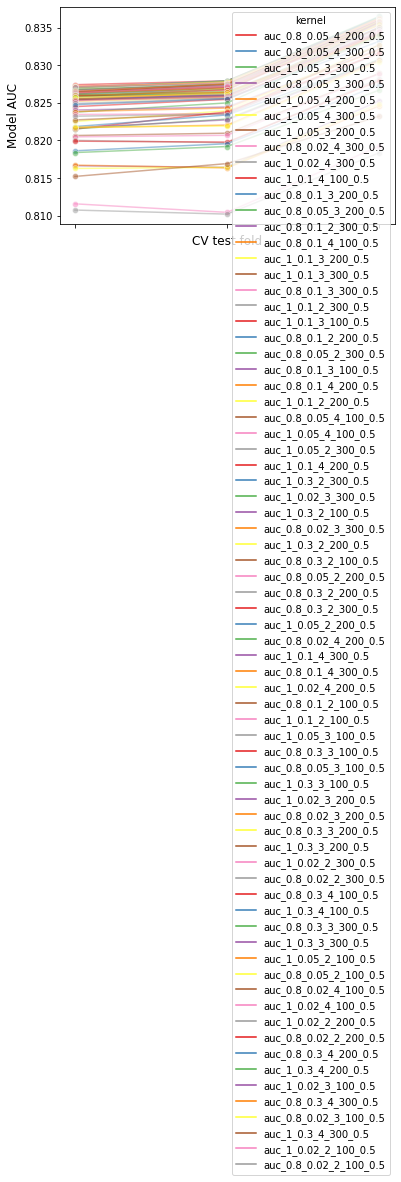

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

In [ ]:
pip install sklearn_evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 12.8 MB/s 
     |████████████████████████████████| 96 kB 6.1 MB/s 
     |████████████████████████████████| 843 kB 51.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


به طور کلی در این نمودارها سعی بر این بود که با ثابت نگاه داشتن تمامی مقادیر روی بهینه ترین مقدار و تغییر تنها یک مقدار تغییرات روی میانگین امتیاز را مشاهده کنیم

با افزایش ضریب یادگیری از 0.02 به 0.05 برای تمامی مقادیر تعداد استیمیتور میانگین امتیاز افزایش می یابد. این اتفاق قابل پیش بینی بود زیرا مقدار 0.05 برای ضریب یادگیری مقدار بهینه است. در ادامه با افزایش ضریب یادگیری میانگین امتیاز برای تمامی حالات کاهش پیدا می کند.همچنین بدیهی است که بالاترین میزان میانگین امتیاز متعلق به زمانی است که تعداد استیمیتورها 200 است چون این تعداد نیز بهینه ترین بدست آمد

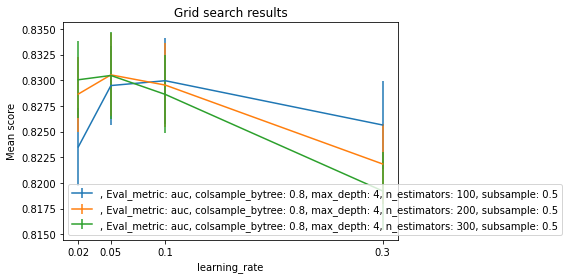

In [ ]:
from sklearn_evaluation import plot
plot.grid_search(grid_scores, change='learning_rate',
                 subset={"learning_rate": [0.05, 0.02, 0.1, 0.3], "max_depth": [4], "n_estimators": [100, 200, 300], "colsample_bytree": [0.8], "subsample": [0.5], "Eval_metric": ['auc']},
                 kind='line')

با افزایش ضریب یادگیری از 0.02 به 0.05 برای تمامی مقادیر ماکسیمم عمق میانگین امتیاز افزایش می یابد. این اتفاق قابل پیش بینی بود زیرا مقدار 0.05 برای ضریب یادگیری مقدار بهینه است. در ادامه با افزایش ضریب یادگیری میانگین امتیاز برای ماکسیمم عمق 4 کاهش و برای سایر حالات اندکی افزایش می یابد ولی بعد از ضریب 0.1 الی 0.3 تمامی حالات کاهشی است.همچنین بدیهی است که بالاترین میزان میانگین امتیاز متعلق به زمانی است که ماکسیمم عمق برابر با 4 است چون این تعداد نیز بهینه ترین بدست آمد

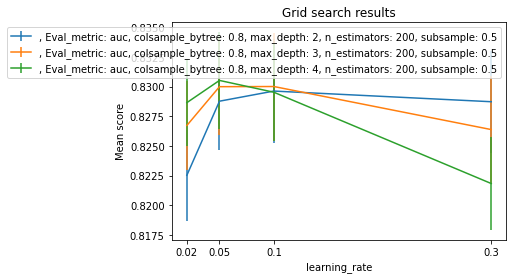

In [ ]:
from sklearn_evaluation import plot
plot.grid_search(grid_scores, change='learning_rate',
                 subset={"learning_rate": [0.05, 0.02, 0.1, 0.3], "max_depth": [2, 3, 4], "n_estimators": [200], "colsample_bytree": [0.8, 0.1], "subsample": [0.5], "Eval_metric": ['auc']},
                 kind='line')